In [25]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [29]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip -o cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/c

In [31]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear los generadores
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Usar los nombres correctos de los directorios que ya definiste
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
   batch_size = 128
)

val_gen = val_data_gen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=128
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False,
    batch_size=128
)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [32]:
# 4
# 4. Crear el modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria: gato o perro
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:

# 5. Entrenar el modelo
history = model.fit(
    train_gen,
    steps_per_epoch=total_train // 128,  # Ajuste al tamaño del batch
    epochs=15,
    validation_data=val_gen,
    validation_steps=total_val // 128
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.4939 - loss: 1.6980 - val_accuracy: 0.5424 - val_loss: 0.6925
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:05 5s/step - accuracy: 0.5391 - loss: 0.6925

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 635ms/step - accuracy: 0.5391 - loss: 0.6925 - val_accuracy: 0.5335 - val_loss: 0.6926
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.5724 - loss: 0.6903 - val_accuracy: 0.6183 - val_loss: 0.6753
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 715ms/step - accuracy: 0.6328 - loss: 0.6780 - val_accuracy: 0.5826 - val_loss: 0.6721
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6387 - loss: 0.6427 - val_accuracy: 0.6440 - val_loss: 0.6321
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6406 - loss: 0.6212 - val_accuracy: 0.6283 - val_loss: 0.6267
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.7023 - loss: 0.5743 - val_accuracy: 0.6964 - val_loss: 0.5958
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8047 - loss: 0.4943 - val_accuracy: 0.6842 - val_loss: 0.6011
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.7509 - loss: 0.4986 - val_accuracy: 0.6797 - val_loss: 0.6

Found 2000 images belonging to 2 classes.


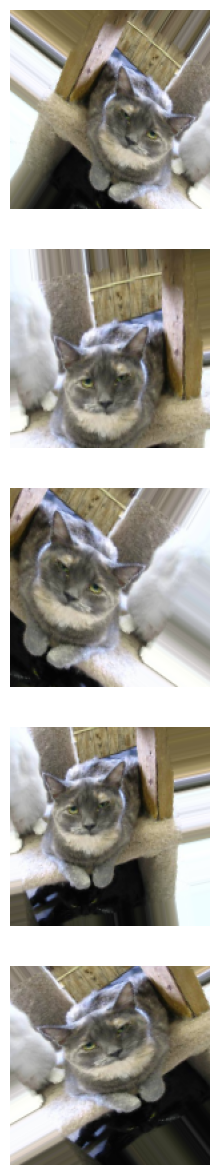

In [35]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [36]:
# 7
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binario: gato o perro
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [37]:
# 8
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 100s 6s/step - accuracy: 0.4764 - loss: 4.7504 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.5046 - loss: 0.6934 - val_accuracy: 0.5340 - val_loss: 0.6818
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.5887 - loss: 0.6679 - val_accuracy: 0.6150 - val_loss: 0.6799
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 105s 7s/step - accuracy: 0.6655 - loss: 0.6618 - val_accuracy: 0.6060 - val_loss: 0.6702
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 105s 7s/step - accuracy: 0.6666 - loss: 0.6225 - val_accuracy: 0.6160 - val_loss: 0.6575
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.7616 - loss: 0.5167 - val_accuracy: 0.6090 - val_loss: 0.7182
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.8075 - loss: 0.4607 - val_accuracy: 0.6570 - val_loss: 0.6830
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.8291 - loss: 0.3688 - val_accuracy: 0.6770 - val_lo

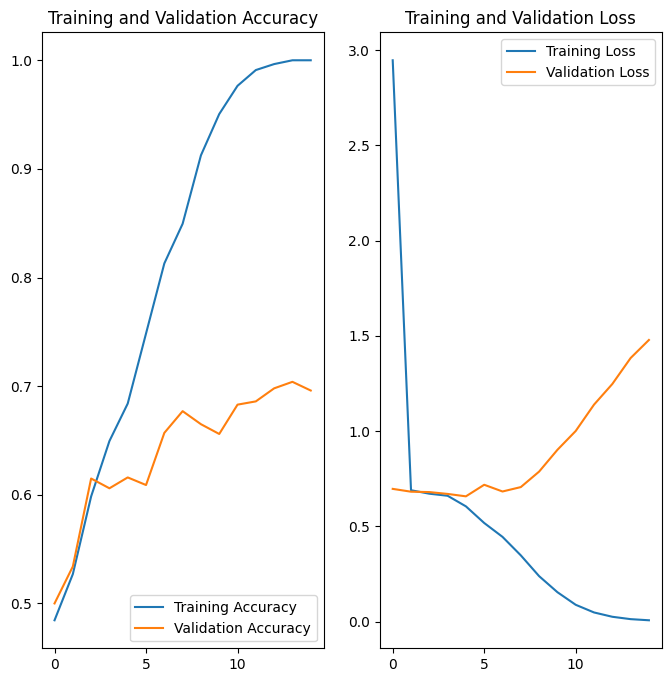

In [38]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving gato.jpg to gato (2).jpg


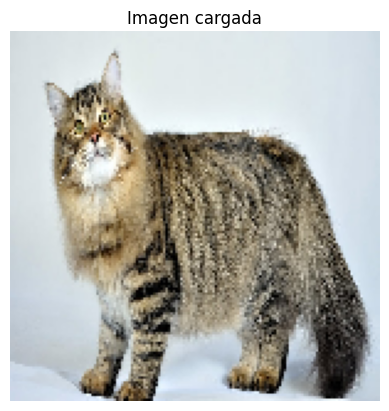

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Probabilidad de ser perro (1): 0.62
👉 Es un perro 🐶


In [47]:

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Subir imagen desde tu computador
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = next(iter(uploaded))

# Tamaño usado en el entrenamiento
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Cargar imagen y prepararla
img = image.load_img(file_name, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Mostrar imagen
plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

# Predicción
prediction = model.predict(img_array)[0][0]
print(f"Probabilidad de ser perro (1): {prediction:.2f}")

# Interpretación
if prediction > 0.5:
    print("👉 Es un perro 🐶")
else:
    print("👉 Es un gato 🐱")



In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


In [49]:
# Cargar modelo preentrenado
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Cargar modelo de ImageNet
model = MobileNetV2(weights='imagenet')
print("✅ Modelo cargado correctamente")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Modelo cargado correctamente


Saving gato.jpg to gato (3).jpg


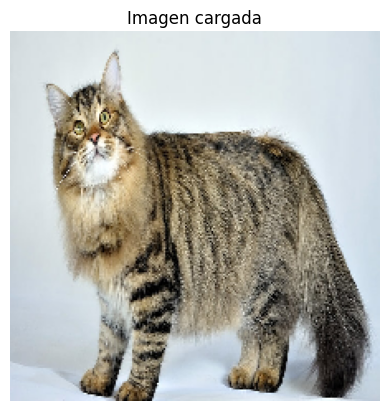

In [50]:
# Subir la imagen desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
for file_name in uploaded.keys():
    img_path = file_name

# Cargar y mostrar la imagen
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

# Convertir la imagen a array para el modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [52]:
# Hacer la predicción con el modelo
prediction = model.predict(img_array)

# Decodificar la predicción
decoded = decode_predictions(prediction, top=1)[0][0]
label = decoded[1]
confidence = decoded[2]

# Mostrar resultados
print(f"🔍 Predicción: {label} ({confidence*100:.2f}%)")

# Listas de etiquetas posibles de gatos y perros según ImageNet
gato_labels = ["tabby", "tiger_cat", "Persian_cat", "Siamese_cat", "Egyptian_cat"]
perro_labels = ["Chihuahua", "Labrador_retriever", "German_shepherd", "beagle", "pug", "golden_retriever", "Maltese_dog", "Pomeranian"]

if label in gato_labels:
    print("✅ Es un gato 🐱")
elif label in perro_labels:
    print("✅ Es un perro 🐶")
else:
    print("❓ No es claramente un gato ni un perro")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
🔍 Predicción: tabby (73.15%)
✅ Es un gato 🐱
